In [1]:
#import libraries
import numpy 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scipy.stats as st 
import dtale 
import warnings
from sklearn.model_selection import StratifiedKFold 

from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
import pandas_profiling as pdp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

In [2]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

In [3]:
fd_ori=fd_dlvry.copy(deep=True)
#future uses one copy create

In [4]:
fd_dlvry.shape

(388, 55)

In [5]:
fd_dlvry.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [6]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [7]:
# d = dtale.show(fd_dlvry)
# d.open_browser()
#we can use datle library for EDA

In [8]:
#looking data with pdp.ProfileReport 
# data = pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

# #Creating the Exploratory Data Analysis of our dataset
# report = pdp.ProfileReport(data, title='Pandas Profiling Report')

In [9]:
# report.widgets

In [10]:
#this library i found on google it's helpful for cleaning data,imputing value and lable encoding
import  datacleaner as dc # pip install datacleaner

dc.autoclean(fd_dlvry).head() 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,1,1,1,1,1,1,1,1,1,136
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,4,4,4,4,4,4,4,4,1,135
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,...,0,4,1,4,4,0,4,1,1,119
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,...,4,0,1,4,4,4,4,0,1,176
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,...,0,0,1,0,0,0,4,4,1,129


In [11]:
fd_dlvry.head() 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,1,1,1,1,1,1,1,1,1,136
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,4,4,4,4,4,4,4,4,1,135
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,...,0,4,1,4,4,0,4,1,1,119
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,...,4,0,1,4,4,4,4,0,1,176
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,...,0,0,1,0,0,0,4,4,1,129


In [12]:
fd_ori.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [13]:
l1=(fd_ori.columns[:])
l1

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [14]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    int32  
 2   Marital Status                             388 non-null    int32  
 3   Occupation                                 388 non-null    int32  
 4   Monthly Income                             388 non-null    int32  
 5   Educational Qualifications                 388 non-null    int32  
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [15]:
df=fd_ori.drop('Reviews',axis=1) #drop reviews because it's take NLP in future i will try it
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [16]:
%matplotlib inline

In [17]:
# we needs to back map for lable encoding 
lbl=dict()
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
                  lbl[i]=dict(zip(fd_ori[i].unique(), fd_dlvry[i].unique()))
    

In [18]:
lbl

{'Age': {20: 20,
  24: 24,
  22: 22,
  27: 27,
  23: 23,
  21: 21,
  28: 28,
  25: 25,
  32: 32,
  30: 30,
  31: 31,
  26: 26,
  18: 18,
  19: 19,
  33: 33,
  29: 29},
 'Gender': {'Female': 0, 'Male': 1},
 'Marital Status': {'Single': 2, 'Married': 0, 'Prefer not to say': 1},
 'Occupation': {'Student': 3,
  'Employee': 0,
  'Self Employeed': 2,
  'House wife': 1},
 'Monthly Income': {'No Income': 4,
  'Below Rs.10000': 2,
  'More than 50000': 3,
  '10001 to 25000': 0,
  '25001 to 50000': 1},
 'Educational Qualifications': {'Post Graduate': 2,
  'Graduate': 0,
  'Ph.D': 1,
  'Uneducated': 4,
  'School': 3},
 'Family size': {4: 4, 3: 3, 6: 6, 2: 2, 5: 5, 1: 1},
 'Medium (P1)': {'Food delivery apps': 1,
  'Walk-in': 2,
  'Direct call': 0,
  'Web browser': 3},
 'Medium (P2)': {' Web browser': 2, ' Direct call': 0, ' Walk-in': 1},
 'Meal(P1)': {'Breakfast': 0, 'Snacks': 3, 'Lunch': 2, 'Dinner': 1},
 'Meal(P2)': {' Lunch': 1, ' Dinner': 0, ' Snacks': 2},
 'Perference(P1)': {'Non Veg foods (L

In [19]:
# practice chi-squared test
# df=pd.crosstab(fd_ori['Meal(P1)'],fd_ori['Occupation'])
# df

# stat, p, dof, expected = st.chi2_contingency(df,correction=True)
# stat, p, dof, expected




#  method 1: Feature selection by phi coefficient

In [20]:
#phi perform for find relation between 
crv={}
l1=[]
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
        '''we are not using lat and long because in EDA all location diffrent (reference dtale lib)'''
        df=pd.crosstab(fd_ori['Output'],fd_ori[i])
        stat, p, dof, expected = st.chi2_contingency(df,correction=True)
     
        deno=sum(df.sum())
        x=numpy.sqrt(stat / deno)
        if(x>0.40): #thresold
             l1.append((i,x))


crv['Output']=l1
        
crv

{'Output': [('Age', 0.41916612670006054),
  ('Ease and convenient', 0.6944483749782563),
  ('Time saving', 0.6333333550979008),
  ('More restaurant choices', 0.5897138785369491),
  ('Easy Payment option', 0.5571767618313485),
  ('More Offers and Discount', 0.5564505912203883),
  ('Good Food quality', 0.4243449172824401),
  ('Good Tracking system', 0.41749280981704445),
  ('Unaffordable', 0.40917014994986045),
  ('Maximum wait time', 0.4135981980209824)]}

In [21]:
#Extract the feature from above dictionary 
basic_f0=[]
for i in l1:
    basic_f0.append(i[0])

basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Unaffordable',
 'Maximum wait time']

In [22]:
X=fd_dlvry[basic_f0] # select X 
y=fd_dlvry['Output'] # select Y


In [23]:
%matplotlib inline

In [24]:
basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Unaffordable',
 'Maximum wait time']

<AxesSubplot:xlabel='Output', ylabel='count'>

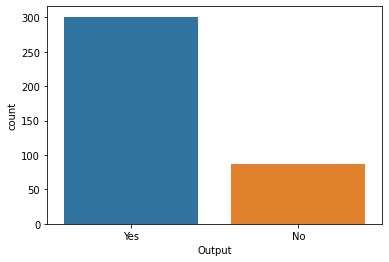

In [25]:
sns.countplot(fd_ori['Output']) # look target feature

#  KNN Algorithm  

In [26]:
# train_test_split by sklearn 
X=fd_dlvry[basic_f0]
y=fd_dlvry['Output']
# from imblearn.under_sampling import NearMiss
# nm=NearMiss()
# Make data balanced
from imblearn.over_sampling import RandomOverSampler
nm=RandomOverSampler(0.5)
X,y=nm.fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [27]:
fd_dlvry['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [28]:
X.shape,y.shape

((451, 10), (451,))

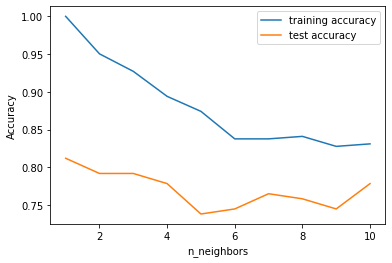

In [29]:
#select best knneighbour find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

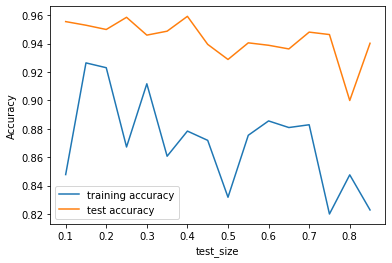

In [30]:
# appropriate test size find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)
knn = KNeighborsClassifier(n_neighbors = 3,p=1)
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        knn.fit(X_train, y_train)
        training_accuracy.append(knn.score(X_test, y_test))
        test_accuracy.append(knn.score(X_train, y_train))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [31]:
#split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [32]:
# fit data and perform the knn algo
neigh = KNeighborsClassifier(n_neighbors=5,p=1)

knn=neigh.fit(X_train,y_train)

knn.score(X_test,y_test)


0.911504424778761

In [33]:
#y_pred for confusion matrix
y_pred=knn.predict(X_test)

In [34]:
#confusion matrix 
cf_matrix_n=confusion_matrix(y_test, y_pred)
cf_matrix_n

array([[29,  8],
       [ 2, 74]], dtype=int64)

In [35]:
#classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        37
           1       0.90      0.97      0.94        76

    accuracy                           0.91       113
   macro avg       0.92      0.88      0.89       113
weighted avg       0.91      0.91      0.91       113



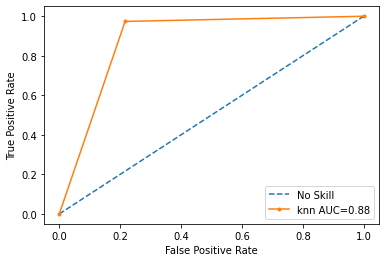

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


<b> Conclusion: </b>

In [37]:
'''Here weighted avg f1-score is good and AUC is greate but problems here Knn is not learning something
knn just use more memory space for perform operation and mostly features are categorical so noise affect
on this algorithms
'''

'Here weighted avg f1-score is good and AUC is greate but problems here Knn is not learning something\nknn just use more memory space for perform operation and mostly features are categorical so noise affect\non this algorithms\n'

<b> Cross-Validation </b>

In [38]:
#without StratifiedKFold 
Knn=KNeighborsClassifier(n_neighbors=5,p=1)
score=cross_val_score(knn,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.8985301090564248 std :0.06837587273379456


In [39]:
#with StratifiedKFold 
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9210526315789473, 0.7368421052631579, 0.9473684210526315, 0.868421052631579, 0.9210526315789473, 0.868421052631579, 0.9736842105263158, 0.972972972972973, 0.9459459459459459, 0.8918918918918919, 0.8378378378378378, 0.8918918918918919]

Maximum Accuracy That can be obtained from this model is: 97.36842105263158 %

Minimum Accuracy: 73.68421052631578 %

Average Accuracy That can be obtained from this model is:: 0.8981152204836415

Standard Deviation is: 0.06361576618116258


# method 2: feature selection using SelectKBest

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

In [41]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [42]:
#select feature 
l1=['latitude','longitude','Pin code','Output','Reviews']
X=fd_dlvry[fd_dlvry.columns[~fd_dlvry.columns.isin(l1)]]
y=fd_dlvry['Output']
nm=RandomOverSampler(0.5)
X,y=nm.fit_sample(X,y)
X.shape

(451, 50)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 9.316221
Feature 1: 0.003630
Feature 2: 20.074741
Feature 3: 20.505829
Feature 4: 17.994555
Feature 5: 8.078422
Feature 6: 1.579549
Feature 7: 0.191377
Feature 8: 0.534471
Feature 9: 0.119076
Feature 10: 0.000492
Feature 11: 6.061611
Feature 12: 0.207498
Feature 13: 4.753241
Feature 14: 1.793446
Feature 15: 1.125728
Feature 16: 14.419699
Feature 17: 10.555238
Feature 18: 6.588744
Feature 19: 0.169387
Feature 20: 48.685478
Feature 21: 9.514518
Feature 22: 17.512916
Feature 23: 0.018828
Feature 24: 23.587325
Feature 25: 7.487221
Feature 26: 25.372040
Feature 27: 1.705143
Feature 28: 0.383820
Feature 29: 32.621878
Feature 30: 0.504429
Feature 31: 0.031913
Feature 32: 1.245802
Feature 33: 0.634414
Feature 34: 22.907221
Feature 35: 20.249143
Feature 36: 8.790534
Feature 37: 7.265941
Feature 38: 1.431049
Feature 39: 8.809431
Feature 40: 0.500901
Feature 41: 0.121579
Feature 42: 2.221359
Feature 43: 2.220683
Feature 44: 0.008663
Feature 45: 6.410577
Feature 46: 12.652167
Feature 47

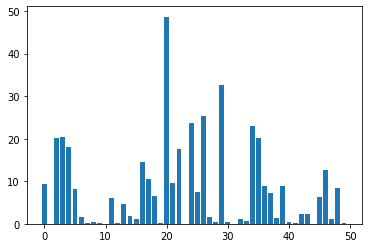

In [44]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

plt.show()

In [45]:
# Extract feature 
basic_f1=[]
for i in range(len(fs.scores_)):
    if(fs.scores_[i]>10): # set Thresold
        print(X_test.columns[i])
        basic_f1.append(X_test.columns[i])

Marital Status
Occupation
Monthly Income
Easy Payment option
More Offers and Discount
Self Cooking
Late Delivery
Bad past experience
Unaffordable
Delay of delivery person picking up food
Order Time
Maximum wait time
Freshness 


# KNN Algorithm 

In [46]:
X=fd_dlvry[basic_f1]
y=fd_dlvry['Output']

nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

In [47]:
X.shape

(602, 13)

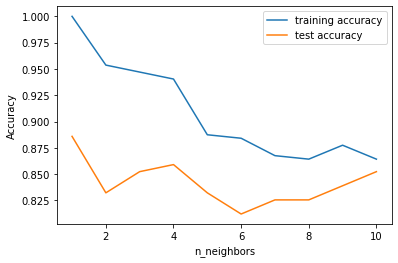

In [48]:
#neighbour find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i,p=1)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

In [49]:
# here some Extra work it's take long time to running
# plt.figure()
# training_accuracy = []
# test_accuracy = []
# # try n_neighbors from 1 to 10
# test_size= numpy.arange(0.1, 0.9,0.05)
# knn = KNeighborsClassifier(n_neighbors = 3)
# for i in test_size:
    
    
#     test_score = []
#     train_score=[]
#     for j in range(1,1000):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=6)
#         knn.fit(X_train, y_train)
#         test_score.append(knn.score(X_test, y_test))
#         train_score.append(knn.score(X_train, y_train))
  

       
#     training_accuracy.append(np.mean(train_score))
#     # record generalization accuracy
#     test_accuracy.append(np.mean(test_score))

# plt.plot(test_size,training_accuracy,label="training accuracy")
# plt.plot(test_size,test_accuracy,label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("test_size")
# plt.legend()

# plt.show()

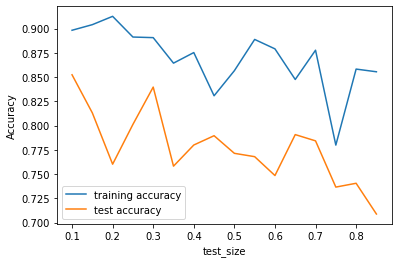

In [50]:
# appropriate test size find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)
knn = KNeighborsClassifier(n_neighbors = 5)
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        knn.fit(X_train, y_train)
        training_accuracy.append(knn.score(X_train,y_train))
        test_accuracy.append(knn.score(X_test,y_test))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [51]:
#split data into test data and train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

neigh = KNeighborsClassifier(n_neighbors=5)

knn=neigh.fit(X_train,y_train)

knn.score(X_test,y_test)

0.7800829875518672

In [52]:
y_pred=knn.predict(X_test)

In [53]:
#confusion matrix 
cf_matrix_n=confusion_matrix(y_test, y_pred)
cf_matrix_n

array([[91, 14],
       [39, 97]], dtype=int64)

In [54]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       105
           1       0.87      0.71      0.79       136

    accuracy                           0.78       241
   macro avg       0.79      0.79      0.78       241
weighted avg       0.80      0.78      0.78       241



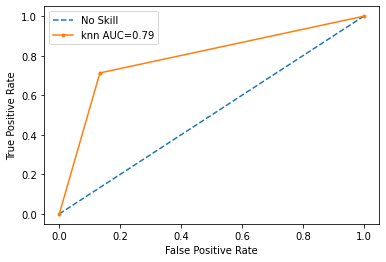

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


<b> Conclusion:</b>

In [56]:
'''feature selection method affect our model,AUC decrease as compare to the first one'''

'feature selection method affect our model,AUC decrease as compare to the first one'

<b> Cross-Validation </b>

In [57]:
#without StratifiedKFold 
Knn=KNeighborsClassifier(n_neighbors=5,p=1)
score=cross_val_score(knn,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.8405882352941175 std :0.050011788947257066


In [58]:
#with StratifiedKFold 
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8823529411764706, 0.8627450980392157, 0.78, 0.82, 0.8, 0.84, 0.86, 0.8, 0.84, 0.86, 0.86, 0.88]

Maximum Accuracy That can be obtained from this model is: 88.23529411764706 %

Minimum Accuracy: 78.0 %

Average Accuracy That can be obtained from this model is:: 0.8404248366013073

Standard Deviation is: 0.03202726088487923


#  Logistics Regression


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
# Here we are using  both method for feature selection  means we takes union both feature union

f_feature=list(set(basic_f0).union(set(basic_f1)))

In [61]:
f_feature

['More Offers and Discount',
 'Maximum wait time',
 'Monthly Income',
 'Good Tracking system',
 'Age',
 'Late Delivery',
 'More restaurant choices',
 'Delay of delivery person picking up food',
 'Good Food quality',
 'Marital Status',
 'Freshness ',
 'Ease and convenient',
 'Self Cooking',
 'Time saving',
 'Order Time',
 'Occupation',
 'Bad past experience',
 'Unaffordable',
 'Easy Payment option']

# Now we need to use some domain knowlegde for selecting feature
Group 1: {'Ease and convenient','Easy Payment option'}\
Group 2 :{'Order Time','Time saving','Delay of delivery person picking up food','Maximum wait time'}\
f_feature=['Ease and convenient','Self Cooking','Maximum wait time','More restaurant choices',
  'Unaffordable', 'More Offers and Discount', 'Good Food quality', 'Good Tracking system', 'Age', 'Bad past experience']

In [62]:
#select X,y 

X=fd_dlvry[f_feature]
y=fd_dlvry['Output']
from imblearn.under_sampling import NearMiss
# nm=NearMiss()
#try to making data balnaced 
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [63]:
X.shape

(602, 19)

In [64]:
f_feature

['More Offers and Discount',
 'Maximum wait time',
 'Monthly Income',
 'Good Tracking system',
 'Age',
 'Late Delivery',
 'More restaurant choices',
 'Delay of delivery person picking up food',
 'Good Food quality',
 'Marital Status',
 'Freshness ',
 'Ease and convenient',
 'Self Cooking',
 'Time saving',
 'Order Time',
 'Occupation',
 'Bad past experience',
 'Unaffordable',
 'Easy Payment option']

In [65]:
Lg=LogisticRegression()

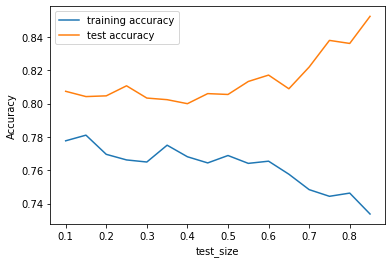

In [66]:
#
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)

for i in test_size:
        t_s=[]
        tn_=[]
        for j in range(0,50):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=np.random.randint(0,100))
            Lg.fit(X_train, y_train)
            
            t_s.append(Lg.score(X_test,y_test))
            tn_.append(Lg.score(X_train,y_train))
        training_accuracy.append(np.mean(t_s))
        test_accuracy.append(np.mean(tn_))


    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()




In [67]:
#data split into train and test size 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
Lg.fit(X_train,y_train)
Lg.score(X_test,y_test)

0.7403314917127072

In [68]:
y_pred=Lg.predict(X_test)

In [69]:
cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix

array([[70, 25],
       [22, 64]], dtype=int64)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        95
           1       0.72      0.74      0.73        86

    accuracy                           0.74       181
   macro avg       0.74      0.74      0.74       181
weighted avg       0.74      0.74      0.74       181



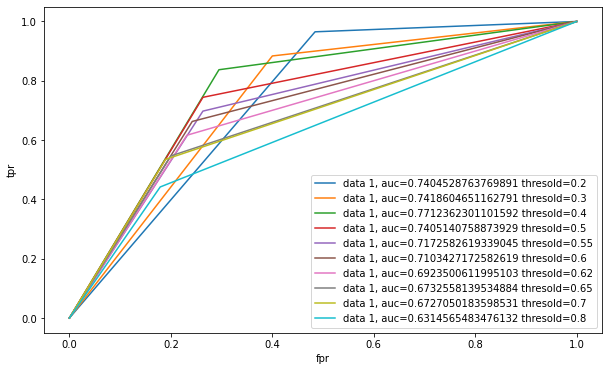

In [71]:
thresolds = [0.2,0.3,0.4,0.5,0.55,0.6,0.62,0.65,0.7,0.8]
plt.figure(figsize=(10,6))
for i in thresolds:
    y_pred_proba = (Lg.predict_proba(X_test)[:,1]>=i).astype(int)
    fpr, tpr, m= metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=f"data 1, auc={auc} thresold={i}")
    plt.legend(loc=4)



plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [72]:
'''In Knn weighted avg f1-score is good and AUC is great but problems in Knn is not learning something
knn just use more memory space for perform operation and mostly features are categorical so noise affect
on this algorithms. Here we can see if we set thresold 0.65 in Logistics regression we get better model  and here algorithms 
something learn 
'''

'In Knn weighted avg f1-score is good and AUC is great but problems in Knn is not learning something\nknn just use more memory space for perform operation and mostly features are categorical so noise affect\non this algorithms. Here we can see if we set thresold 0.65 in Logistics regression we get better model  and here algorithms \nsomething learn \n'

<b> Cross-Validation </b>

In [73]:
score=cross_val_score(Lg,X,y,cv=10)
print('List of possible accuracy:', score) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(score)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(score)) 
print('\nStandard Deviation is:',np.std(score)) 

List of possible accuracy: [0.70491803 0.81967213 0.88333333 0.75       0.76666667 0.8
 0.8        0.78333333 0.75       0.7       ]

Maximum Accuracy That can be obtained from this model is: 88.33333333333333 %

Minimum Accuracy: 78.0 %

Average Accuracy That can be obtained from this model is:: 0.775792349726776

Standard Deviation is: 0.05186598427565795


In [74]:
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    Lg.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(Lg.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8431372549019608, 0.7450980392156863, 0.82, 0.7, 0.86, 0.7, 0.8, 0.8, 0.76, 0.76, 0.84, 0.86]

Maximum Accuracy That can be obtained from this model is: 86.0 %

Minimum Accuracy: 70.0 %

Average Accuracy That can be obtained from this model is:: 0.7906862745098039

 Median Accuracy That can be obtained from this model is:: 0.8

Standard Deviation is: 0.05495005479854587


In [75]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(Lg, X, y, cv=cv)

array([0.75138122, 0.74585635, 0.71823204, 0.7679558 , 0.81767956])

# DecisionTree (feature selection with both method)  

In [76]:
X=fd_dlvry[f_feature]
y=fd_dlvry['Output']
nm=RandomOverSampler() # try to making data balanced 
X,y=nm.fit_sample(X,y)
fd_dlvry['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [78]:
clf.score(X_test,y_test)

0.9748743718592965

In [79]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1])

In [80]:
print(confusion_matrix(y_test,y_pred))

[[95  0]
 [ 5 99]]


In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       1.00      0.95      0.98       104

    accuracy                           0.97       199
   macro avg       0.97      0.98      0.97       199
weighted avg       0.98      0.97      0.97       199



In [82]:
cross_val_score(clf, X, y, cv=12)

array([0.92156863, 0.84313725, 0.86      , 0.96      , 0.96      ,
       0.88      , 0.92      , 1.        , 0.9       , 0.94      ,
       0.98      , 0.96      ])

In [83]:
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(Lg.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.7647058823529411, 0.803921568627451, 0.8, 0.76, 0.84, 0.76, 0.8, 0.82, 0.66, 0.74, 0.86, 0.86]

Maximum Accuracy That can be obtained from this model is: 86.0 %

Minimum Accuracy: 66.0 %

Average Accuracy That can be obtained from this model is:: 0.7890522875816993

 Median Accuracy That can be obtained from this model is:: 0.8

Standard Deviation is: 0.05433140938924314


In [84]:
import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('gini')
# graph

'gini.png'

# Feature selection with Decision Tree 

In [85]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [86]:
fd_ori=fd_dlvry.copy(deep=True)
df=pd.get_dummies(fd_dlvry)
df.shape

(388, 223)

In [87]:
l1=[]
for i in df.columns:
    if(i!='Output'):
        l1.append(i)
    

In [88]:
X=df[l1]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [90]:
clf.score(X_test,y_test)

0.9798994974874372

In [91]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05710918, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00937372, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01748027, 0.        , 0.        , 0.47272174,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15381422,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [92]:
def feature_extract(clf,l1):
    values = clf.feature_importances_
    importances = [(l1[i], values[i]) for i in range(len(l1))]
    importances.sort(reverse=True, key=lambda x:x[1])
    l3=[]
    for i in importances[:12]:
        l3.append(i[0])
    return l3

    

In [93]:
feature_extract(clf,l1)

['Ease and convenient_Disagree',
 'More restaurant choices_Disagree',
 'Unaffordable_Agree',
 'Occupation_Student',
 'Missing item_Neutral',
 'Unavailability_Disagree',
 'Late Delivery_Disagree',
 'Maximum wait time_15 minutes',
 'Delay of delivery person getting assigned_Strongly agree',
 'Perference(P2)_ Sweets',
 'High Quality of package_Important',
 'Long delivery time_Agree']

In [94]:
X=df[l1]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [96]:
clf.score(X_test,y_test)

0.9547738693467337

In [97]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1], dtype=int64)

In [98]:
print(confusion_matrix(y_test,y_pred))

[[98  6]
 [ 3 92]]


In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       104
           1       0.94      0.97      0.95        95

    accuracy                           0.95       199
   macro avg       0.95      0.96      0.95       199
weighted avg       0.96      0.95      0.95       199



In [100]:
lst_accu_stratified = [] 
x=0
feature_common=pd.DataFrame()
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    feature_common[x]=feature_extract(clf,l1)
    x+=1
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9411764705882353, 0.9411764705882353, 0.98, 1.0, 0.9, 0.94, 0.88, 0.94, 0.94, 0.86, 0.94, 0.92]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 86.0 %

Average Accuracy That can be obtained from this model is:: 0.931862745098039

 Median Accuracy That can be obtained from this model is:: 0.94

Standard Deviation is: 0.03697768376333684


In [101]:
feature_common

,0,1,2,3,4,5,6,7,8,9,10,11
0,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree
1,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,Time saving_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,Time saving_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree
2,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Politeness_Very Important,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree
3,Missing item_Neutral,Occupation_Student,Occupation_Student,Occupation_Student,Missing item_Neutral,Missing item_Neutral,Occupation_Student,Occupation_Employee,Occupation_Student,Good Food quality_Agree,Occupation_Student,Occupation_Student
4,Occupation_Student,Missing item_Neutral,Missing item_Neutral,Missing item_Neutral,More restaurant choices_Disagree,Occupation_Student,Missing item_Neutral,Unaffordable_Strongly agree,Missing item_Neutral,High Quality of package_Very Important,Missing item_Neutral,Missing item_Neutral
5,Perference(P2)_ Sweets,Perference(P2)_ Sweets,Perference(P2)_ Sweets,Perference(P2)_ Sweets,Influence of time_No,Perference(P2)_ Sweets,Perference(P2)_ Sweets,Good Food quality_Neutral,Perference(P2)_ Sweets,Age,Perference(P2)_ Sweets,Perference(P2)_ Sweets
6,Unavailability_Disagree,Unavailability_Disagree,Educational Qualifications_Graduate,Unavailability_Disagree,Unaffordable_Strongly disagree,Unavailability_Disagree,High Quality of package_Important,Meal(P2)_ Snacks,Maximum wait time_15 minutes,Marital Status_Prefer not to say,Unavailability_Disagree,Unavailability_Disagree
7,Late Delivery_Disagree,Late Delivery_Disagree,Unavailability_Disagree,Late Delivery_Disagree,Temperature_Moderately Important,Maximum wait time_15 minutes,Unavailability_Disagree,Order placed by mistake_Strongly disagree,Medium (P2)_ Direct call,Unavailability_Disagree,Educational Qualifications_Post Graduate,Late Delivery_Disagree
8,Educational Qualifications_Post Graduate,Delay of delivery person getting assigned_Stro...,Late Delivery_Disagree,Educational Qualifications_Post Graduate,Late Delivery_Agree,Late Delivery_Disagree,Educational Qualifications_Graduate,More Offers and Discount_Agree,Late Delivery_Disagree,Meal(P1)_Breakfast,Late Delivery_Disagree,Delay of delivery person getting assigned_Stro...
9,Maximum wait time_15 minutes,Maximum wait time_15 minutes,Maximum wait time_15 minutes,High Quality of package_Important,Educational Qualifications_Post Graduate,High Quality of package_Important,Maximum wait time_15 minutes,Self Cooking_Strongly agree,Educational Qualifications_Graduate,Maximum wait time_45 minutes,Maximum wait time_15 minutes,Maximum wait time_15 minutes


In [102]:
l2=feature_extract(clf,l1)

In [103]:
relation_between_feature=pd.DataFrame(index=l2)

In [104]:
relation_between_feature.head()

""
Ease and convenient_Disagree
More restaurant choices_Disagree
Unaffordable_Agree
Occupation_Student
Missing item_Neutral


In [105]:
X[l2]

,Ease and convenient_Disagree,More restaurant choices_Disagree,Unaffordable_Agree,Occupation_Student,Missing item_Neutral,Perference(P2)_ Sweets,Unavailability_Disagree,Late Delivery_Disagree,Delay of delivery person getting assigned_Strongly agree,Maximum wait time_15 minutes,High Quality of package_Important,Good Tracking system_Agree
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,1,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,1,1
4,0,0,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
597,1,0,1,0,0,0,0,0,0,1,1,0
598,0,0,0,1,0,0,1,0,0,1,0,1
599,1,0,1,0,0,1,0,0,0,0,1,1
600,1,1,0,0,0,1,0,0,0,0,0,1


In [106]:

for i in l2:
    l1=[]
    for j in l2:
        df_t=pd.crosstab(X[j],X[i])
        stat, p, dof, expected = st.chi2_contingency(df_t,correction=True)
        t=min(df_t.shape)-1
        deno=sum(df_t.sum())
        x=np.sqrt(stat / deno)
        l1.append(x)
    relation_between_feature[i]=l1
    



        


In [107]:
relation_between_feature

,Ease and convenient_Disagree,More restaurant choices_Disagree,Unaffordable_Agree,Occupation_Student,Missing item_Neutral,Perference(P2)_ Sweets,Unavailability_Disagree,Late Delivery_Disagree,Delay of delivery person getting assigned_Strongly agree,Maximum wait time_15 minutes,High Quality of package_Important,Good Tracking system_Agree
Ease and convenient_Disagree,0.996166,0.425019,0.261409,0.251448,0.045275,0.348319,0.117783,0.072012,0.148865,0.317685,0.158459,0.003268
More restaurant choices_Disagree,0.425019,0.995226,0.048547,0.349114,0.067990,0.262024,0.033006,0.050248,0.050472,0.213920,0.065485,0.002705
Unaffordable_Agree,0.261409,0.048547,0.995761,0.134963,0.064384,0.038766,0.252981,0.099661,0.001045,0.096381,0.096871,0.005415
Occupation_Student,0.251448,0.349114,0.134963,0.996624,0.027766,0.086597,0.106001,0.051357,0.058766,0.062646,0.025576,0.007005
Missing item_Neutral,0.045275,0.067990,0.064384,0.027766,0.994625,0.162228,0.132716,0.145009,0.091212,0.045630,0.218654,0.012951
Perference(P2)_ Sweets,0.348319,0.262024,0.038766,0.086597,0.162228,0.994828,0.163920,0.029762,0.086588,0.045136,0.090874,0.135377
Unavailability_Disagree,0.117783,0.033006,0.252981,0.106001,0.132716,0.163920,0.996359,0.015358,0.110546,0.145113,0.035120,0.034445
Late Delivery_Disagree,0.072012,0.050248,0.099661,0.051357,0.145009,0.029762,0.015358,0.993697,0.020871,0.020490,0.012679,0.065983
Delay of delivery person getting assigned_Strongly agree,0.148865,0.050472,0.001045,0.058766,0.091212,0.086588,0.110546,0.020871,0.992554,0.066383,0.114350,0.040118
Maximum wait time_15 minutes,0.317685,0.213920,0.096381,0.062646,0.045630,0.045136,0.145113,0.020490,0.066383,0.993855,0.063123,0.017115


In [108]:
fd_dlvry.shape

(388, 51)

In [109]:
relation_between_feature.style.apply(lambda x: ["background: red" if v>0.25 and v<0.99 else "" for v in x], axis = 1)

,Ease and convenient_Disagree,More restaurant choices_Disagree,Unaffordable_Agree,Occupation_Student,Missing item_Neutral,Perference(P2)_ Sweets,Unavailability_Disagree,Late Delivery_Disagree,Delay of delivery person getting assigned_Strongly agree,Maximum wait time_15 minutes,High Quality of package_Important,Good Tracking system_Agree
Ease and convenient_Disagree,0.996166,0.425019,0.261409,0.251448,0.045275,0.348319,0.117783,0.072012,0.148865,0.317685,0.158459,0.003268
More restaurant choices_Disagree,0.425019,0.995226,0.048547,0.349114,0.067990,0.262024,0.033006,0.050248,0.050472,0.213920,0.065485,0.002705
Unaffordable_Agree,0.261409,0.048547,0.995761,0.134963,0.064384,0.038766,0.252981,0.099661,0.001045,0.096381,0.096871,0.005415
Occupation_Student,0.251448,0.349114,0.134963,0.996624,0.027766,0.086597,0.106001,0.051357,0.058766,0.062646,0.025576,0.007005
Missing item_Neutral,0.045275,0.067990,0.064384,0.027766,0.994625,0.162228,0.132716,0.145009,0.091212,0.045630,0.218654,0.012951
Perference(P2)_ Sweets,0.348319,0.262024,0.038766,0.086597,0.162228,0.994828,0.163920,0.029762,0.086588,0.045136,0.090874,0.135377
Unavailability_Disagree,0.117783,0.033006,0.252981,0.106001,0.132716,0.163920,0.996359,0.015358,0.110546,0.145113,0.035120,0.034445
Late Delivery_Disagree,0.072012,0.050248,0.099661,0.051357,0.145009,0.029762,0.015358,0.993697,0.020871,0.020490,0.012679,0.065983
Delay of delivery person getting assigned_Strongly agree,0.148865,0.050472,0.001045,0.058766,0.091212,0.086588,0.110546,0.020871,0.992554,0.066383,0.114350,0.040118
Maximum wait time_15 minutes,0.317685,0.213920,0.096381,0.062646,0.045630,0.045136,0.145113,0.020490,0.066383,0.993855,0.063123,0.017115


In [110]:
multicolinear_feature=["Perference(P2)_ Sweets","Maximum wait time_15 minutes","More restaurant choices_Disagree"]

In [111]:
final_feature=list(relation_between_feature.columns)

In [112]:
final_feature

['Ease and convenient_Disagree',
 'More restaurant choices_Disagree',
 'Unaffordable_Agree',
 'Occupation_Student',
 'Missing item_Neutral',
 'Perference(P2)_ Sweets',
 'Unavailability_Disagree',
 'Late Delivery_Disagree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Maximum wait time_15 minutes',
 'High Quality of package_Important',
 'Good Tracking system_Agree']

In [113]:
set1 = set(final_feature)
set2 = set(multicolinear_feature)
final_feature = list(set1 - set2)

In [114]:
final_feature

['High Quality of package_Important',
 'Occupation_Student',
 'Unaffordable_Agree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Late Delivery_Disagree',
 'Good Tracking system_Agree',
 'Missing item_Neutral',
 'Unavailability_Disagree',
 'Ease and convenient_Disagree']

In [115]:

import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('fgini')
# graph

'fgini.png'

# Decesion Tree model

In [116]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [117]:
fd_dlvry.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,Female,Single,Student,No Income,Post Graduate,4,Food delivery apps,Web browser,Breakfast,...,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Food delivery apps,Web browser,Snacks,...,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Food delivery apps,Direct call,Lunch,...,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,1
3,22,Female,Single,Student,No Income,Graduate,6,Food delivery apps,Walk-in,Snacks,...,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,1
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Walk-in,Direct call,Lunch,...,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,1


In [118]:
fd_ori=fd_dlvry.copy(deep=True)
df=pd.get_dummies(fd_dlvry)
df.shape

(388, 223)

In [119]:
final_feature=['Unaffordable_Agree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Long delivery time_Agree',
 'Wrong order delivered_Strongly disagree',
 'Missing item_Neutral',
 'Unavailability_Disagree',
 'Occupation_Student',
 'Ease and convenient_Disagree',
 'Late Delivery_Disagree']

In [120]:
final_feature

['Unaffordable_Agree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Long delivery time_Agree',
 'Wrong order delivered_Strongly disagree',
 'Missing item_Neutral',
 'Unavailability_Disagree',
 'Occupation_Student',
 'Ease and convenient_Disagree',
 'Late Delivery_Disagree']

In [121]:
X=df[final_feature]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [123]:
clf.score(X_test,y_test)

0.9095477386934674

In [124]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0], dtype=int64)

In [125]:
print(confusion_matrix(y_test,y_pred))

[[90  9]
 [ 9 91]]


In [126]:
lst_accu_stratified = [] 
x=0
x=0
feature_common=pd.DataFrame()
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8627450980392157, 0.8235294117647058, 0.88, 0.88, 0.92, 0.82, 0.86, 0.92, 0.86, 0.94, 0.88, 0.84]

Maximum Accuracy That can be obtained from this model is: 94.0 %

Minimum Accuracy: 82.0 %

Average Accuracy That can be obtained from this model is:: 0.8738562091503269

 Median Accuracy That can be obtained from this model is:: 0.8713725490196078

Standard Deviation is: 0.03632458417433719


In [127]:
list_1=[1,0,1,0,1,0,0,0,0]
pre=np.array(list_1).reshape(1,-1)
nk=dict(zip(X_test.columns,list_1))
nk


{'Unaffordable_Agree': 1,
 'Delay of delivery person getting assigned_Strongly agree': 0,
 'Long delivery time_Agree': 1,
 'Wrong order delivered_Strongly disagree': 0,
 'Missing item_Neutral': 1,
 'Unavailability_Disagree': 0,
 'Occupation_Student': 0,
 'Ease and convenient_Disagree': 0,
 'Late Delivery_Disagree': 0}

In [128]:
# import graphviz
# import sklearn.tree as tree
# # DOT data
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=X_test.columns,  
#                                 class_names='01',
#                                 filled=True)

# # # Draw graph
# graph = graphviz.Source(dot_data,format="png") 
# graph.render('fgini')
# # graph

In [129]:
clf.predict(pre)

array([0], dtype=int64)

In [130]:
nk.keys()

dict_keys(['Unaffordable_Agree', 'Delay of delivery person getting assigned_Strongly agree', 'Long delivery time_Agree', 'Wrong order delivered_Strongly disagree', 'Missing item_Neutral', 'Unavailability_Disagree', 'Occupation_Student', 'Ease and convenient_Disagree', 'Late Delivery_Disagree'])

In [131]:
fd_dlvry['Missing item'].unique()

array(['Agree', 'Strongly agree', 'Disagree', 'Neutral',
       'Strongly disagree'], dtype=object)

# Random forest


## Feature selection by Random forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=6,min_samples_split=4)

In [133]:
from sklearn.feature_selection import SelectFromModel

In [134]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=RandomForestClassifier(max_depth=5,min_samples_split=2)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [136]:
lst_accu_stratified = [] 
x=0
feature_common=pd.DataFrame()
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    feature_common[x]=feature_extract(clf,X_train.columns)
    x+=1
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
   
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9444444444444444, 0.8611111111111112, 1.0, 0.9722222222222222, 0.8888888888888888, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.9428571428571428, 0.9428571428571428, 0.7714285714285715, 0.9714285714285714]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 77.14285714285715 %

Average Accuracy That can be obtained from this model is:: 0.9181216931216931

 Median Accuracy That can be obtained from this model is:: 0.9297619047619048

Standard Deviation is: 0.058360621819085565


In [137]:
feature_common

,0,1,2,3,4,5,6,7,8,9,10,11
0,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important
1,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important
2,Freshness _Very Important,Freshness _Very Important,Temperature_Very Important,Freshness _Very Important,Freshness _Very Important,Temperature_Very Important,Temperature_Very Important,Temperature_Very Important,Freshness _Very Important,Freshness _Very Important,Freshness _Very Important,Freshness _Very Important
3,Temperature_Very Important,Good Taste _Important,Freshness _Very Important,Temperature_Very Important,Temperature_Very Important,Freshness _Very Important,Good Taste _Important,Freshness _Very Important,Good Taste _Important,Temperature_Very Important,Temperature_Very Important,Temperature_Very Important
4,Good Taste _Important,Temperature_Very Important,Good Taste _Important,Good Taste _Moderately Important,Good Taste _Important,Good Taste _Important,Good Taste _Moderately Important,Good Taste _Moderately Important,Temperature_Very Important,Good Taste _Important,Good Taste _Moderately Important,Good Taste _Important
5,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Taste _Moderately Important,Freshness _Very Important,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Taste _Moderately Important
6,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Taste _Important,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Good Taste _Important,Good Quantity_Slightly Important,Good Quantity_Moderately Important,Good Taste _Important,Good Quantity_Moderately Important
7,Good Quantity_Slightly Important,Good Quantity_Slightly Important,Freshness _Important,Freshness _Important,Missing item_Strongly agree,Good Quantity_Slightly Important,Good Quantity_Slightly Important,Politeness_Very Important,Temperature_Important,Temperature_Important,Freshness _Important,Good Quantity_Slightly Important
8,Freshness _Important,Temperature_Slightly Important,Good Quantity_Slightly Important,Good Quantity_Slightly Important,Freshness _Important,Freshness _Important,High Quality of package_Very Important,High Quality of package_Moderately Important,Freshness _Important,Good Quantity_Slightly Important,Good Quantity_Slightly Important,Temperature_Important
9,Age,Educational Qualifications_Post Graduate,Age,Age,Politeness_Very Important,High Quality of package_Moderately Important,Freshness _Important,Good Quantity_Slightly Important,Politeness_Very Important,High Quality of package_Very Important,Unavailability_Disagree,Educational Qualifications_Post Graduate


In [138]:
feature_common[2]

0                          Good Quantity_Important
1                       Good Taste _Very Important
2                       Temperature_Very Important
3                        Freshness _Very Important
4                            Good Taste _Important
5                 Good Taste _Moderately Important
6               Good Quantity_Moderately Important
7                             Freshness _Important
8                 Good Quantity_Slightly Important
9                                              Age
10    High Quality of package_Moderately Important
11          High Quality of package_Very Important
Name: 2, dtype: object

## Build Model

In [188]:
X=df[feature_common[2]]
y=df.iloc[:,-1]

In [189]:
from  imblearn.under_sampling import RandomUnderSampler

nm=RandomUnderSampler()
X,y=nm.fit_sample(X,y)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=RandomForestClassifier(max_depth=6,min_samples_split=4)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=4)

In [191]:
clf.score(X_test,y_test)

0.9217391304347826

In [192]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0], dtype=uint8)

In [193]:
print(confusion_matrix(y_test,y_pred))

[[56  4]
 [ 5 50]]


In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.93      0.91      0.92        55

    accuracy                           0.92       115
   macro avg       0.92      0.92      0.92       115
weighted avg       0.92      0.92      0.92       115



In [195]:
lst_accu_stratified = [] 
x=0

skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
   
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.896551724137931, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9655172413793104, 0.896551724137931, 0.9655172413793104, 1.0, 1.0, 0.9655172413793104, 0.9310344827586207]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 89.65517241379311 %

Average Accuracy That can be obtained from this model is:: 0.9454022988505746

 Median Accuracy That can be obtained from this model is:: 0.9310344827586207

Standard Deviation is: 0.03288943431683793


## (Final Model)Using method 1 feature through build model

In [224]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')
fd_ori=fd_dlvry.copy()

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [225]:
basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Unaffordable',
 'Maximum wait time']

In [226]:
# import  datacleaner as dc # pip install datacleaner
dc.autoclean(fd_dlvry).head() 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,2,4,1,2,0,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,0,3,1,2,3,...,2,4,4,4,4,4,4,4,4,1
2,22,1,2,3,2,2,3,1,0,2,...,2,0,4,1,4,4,0,4,1,1
3,22,0,2,3,4,0,6,1,1,3,...,2,4,0,1,4,4,4,4,0,1
4,22,1,2,3,2,2,4,2,0,2,...,2,0,0,1,0,0,0,4,4,1


In [227]:
lbl=dict()
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Reviews']:
                  lbl[i]=dict(zip(fd_ori[i].unique(), fd_dlvry[i].unique()))

In [228]:
lbl

{'Age': {20: 20,
  24: 24,
  22: 22,
  27: 27,
  23: 23,
  21: 21,
  28: 28,
  25: 25,
  32: 32,
  30: 30,
  31: 31,
  26: 26,
  18: 18,
  19: 19,
  33: 33,
  29: 29},
 'Gender': {'Female': 0, 'Male': 1},
 'Marital Status': {'Single': 2, 'Married': 0, 'Prefer not to say': 1},
 'Occupation': {'Student': 3,
  'Employee': 0,
  'Self Employeed': 2,
  'House wife': 1},
 'Monthly Income': {'No Income': 4,
  'Below Rs.10000': 2,
  'More than 50000': 3,
  '10001 to 25000': 0,
  '25001 to 50000': 1},
 'Educational Qualifications': {'Post Graduate': 2,
  'Graduate': 0,
  'Ph.D': 1,
  'Uneducated': 4,
  'School': 3},
 'Family size': {4: 4, 3: 3, 6: 6, 2: 2, 5: 5, 1: 1},
 'Medium (P1)': {'Food delivery apps': 1,
  'Walk-in': 2,
  'Direct call': 0,
  'Web browser': 3},
 'Medium (P2)': {' Web browser': 2, ' Direct call': 0, ' Walk-in': 1},
 'Meal(P1)': {'Breakfast': 0, 'Snacks': 3, 'Lunch': 2, 'Dinner': 1},
 'Meal(P2)': {' Lunch': 1, ' Dinner': 0, ' Snacks': 2},
 'Perference(P1)': {'Non Veg foods (L

In [229]:
X=fd_dlvry[basic_f0]
y=fd_dlvry.iloc[:,-1]
from  imblearn.under_sampling import RandomUnderSampler

nm=RandomUnderSampler()
X,y=nm.fit_resample(X,y)

In [230]:
X.head()

,Age,Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Unaffordable,Maximum wait time
0,25,3,0,3,3,3,3,3,3,2
1,24,0,2,3,3,3,0,0,1,2
2,25,3,0,3,3,3,3,3,3,2
3,28,1,2,1,1,1,4,2,2,3
4,27,0,0,1,3,4,1,3,0,2


In [231]:
X.shape

(174, 10)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=RandomForestClassifier(max_depth=6,min_samples_split=4)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=4)

In [233]:
clf.score(X_test,y_test)

0.9827586206896551

In [234]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [235]:
print(confusion_matrix(y_test,y_pred))

[[30  0]
 [ 1 27]]


In [236]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.96      0.98        28

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [237]:
lst_accu_stratified = [] 
x=0

skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
   
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [1.0, 1.0, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 1.0, 1.0, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.7857142857142857]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 78.57142857142857 %

Average Accuracy That can be obtained from this model is:: 0.9253968253968256

 Median Accuracy That can be obtained from this model is:: 0.9285714285714286

Standard Deviation is: 0.06596379287358776


In [211]:
for i in basic_f0:
    print(i,fd_ori[i].unique())

Age [20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Ease and convenient ['Neutral' 'Strongly agree' 'Agree' 'Strongly disagree' 'Disagree']
Time saving ['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
More restaurant choices ['Neutral' 'Strongly agree' 'Agree' 'Strongly disagree' 'Disagree']
Easy Payment option ['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
More Offers and Discount ['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
Good Food quality ['Neutral' 'Disagree' 'Agree' 'Strongly agree' 'Strongly disagree']
Good Tracking system ['Neutral' 'Agree' 'Strongly agree' 'Disagree' 'Strongly disagree']
Unaffordable ['Neutral' 'Strongly agree' 'Agree' 'Disagree' 'Strongly disagree']
Maximum wait time ['30 minutes' '45 minutes' '60 minutes' 'More than 60 minutes'
 '15 minutes']


In [212]:
basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Unaffordable',
 'Maximum wait time']

In [213]:
lbl

{'Age': {20: 20,
  24: 24,
  22: 22,
  27: 27,
  23: 23,
  21: 21,
  28: 28,
  25: 25,
  32: 32,
  30: 30,
  31: 31,
  26: 26,
  18: 18,
  19: 19,
  33: 33,
  29: 29},
 'Gender': {'Female': 0, 'Male': 1},
 'Marital Status': {'Single': 2, 'Married': 0, 'Prefer not to say': 1},
 'Occupation': {'Student': 3,
  'Employee': 0,
  'Self Employeed': 2,
  'House wife': 1},
 'Monthly Income': {'No Income': 4,
  'Below Rs.10000': 2,
  'More than 50000': 3,
  '10001 to 25000': 0,
  '25001 to 50000': 1},
 'Educational Qualifications': {'Post Graduate': 2,
  'Graduate': 0,
  'Ph.D': 1,
  'Uneducated': 4,
  'School': 3},
 'Family size': {4: 4, 3: 3, 6: 6, 2: 2, 5: 5, 1: 1},
 'Medium (P1)': {'Food delivery apps': 1,
  'Walk-in': 2,
  'Direct call': 0,
  'Web browser': 3},
 'Medium (P2)': {' Web browser': 2, ' Direct call': 0, ' Walk-in': 1},
 'Meal(P1)': {'Breakfast': 0, 'Snacks': 3, 'Lunch': 2, 'Dinner': 1},
 'Meal(P2)': {' Lunch': 1, ' Dinner': 0, ' Snacks': 2},
 'Perference(P1)': {'Non Veg foods (L

In [214]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))


In [215]:
model = pickle.load(open('model.pkl','rb'))


In [223]:
clf.predict(np.array([20,2,3,4,3,1,1,3,4,5]).reshape(1,-1))

array([1], dtype=int64)

In [221]:

import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('food_final')

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'